In [5]:
from collections import Counter
from utils_svm_reviews import *
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [6]:
# 6
def to_sparse(l):
    return Counter(l)


In [7]:
# 7
def load_data():
    reviews = load_and_shuffle_data()
    train = reviews[:1500]
    test = reviews[1500:]
    X_train = [to_sparse(x[:-1]) for x in train]
    y_train = [x[-1] for x in train]
    X_test = [to_sparse(x[:-1]) for x in test]
    y_test = [x[-1] for x in test]
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = load_data()


In [8]:
# 8
def pegasos1(X, y, lambda_reg=0.25, max_epoch=30):
    epoch = 0
    w = {}
    t = 0
    order_list = range(len(X))
    while epoch < max_epoch:
        random.shuffle()
        for i in order_list:
            t += 1
            eta = 1 / (t * lambda_reg)
            if y[i] * dotProduct(X[i], w) < 1:
                increment(w, - eta * lambda_reg, w)
                increment(w, eta * y[i], X[i])
            else:
                increment(w, - eta * lambda_reg, w)
        epoch += 1
    return w


In [9]:
# 9
def pegasos2(X, y, lambda_reg=0.1, max_epoch=30, tolerance=1e-2, useConverge=True):
    epoch = 0
    w = {}
    t = 1
    scale = 1
    order_list = range(len(X))
    while epoch < max_epoch:
        epoch += 1
        prev_sum = sum(w[weight]**2 for weight in w)
        random.shuffle(order_list)
        for i in order_list:
            t += 1
            eta = 1 / (t * lambda_reg)
            scale = (1 - eta * lambda_reg) * scale
            if y[i] * scale * dotProduct(w, X[i]) < 1:
                increment(w, eta * y[i] / scale, X[i])
        cur_sum = sum(w[weight]**2 for weight in w)
        if useConverge and np.abs(scale**2 * (prev_sum - cur_sum)) < tolerance:
            break
    for k, v in w.items():
        w[k] = v * scale
    return w


In [ ]:
# 10

In [ ]:
%%time
w1 = pegasos1(X_train, y_train)

Wall time: 6min 43s


In [14]:
%%time
w2 = pegasos2(X_train, y_train, useConverge=False)

TypeError: 'range' object does not support item assignment

In [35]:
print("w1['friends']: ", w1['friends'])
print("w2['friends']: ", w2['friends'])

w1['friends']:  0.020533333333333324
w2['friends']:  0.017555165440767868


In [10]:
# 11 classification error
def classification_error(w, X, y):
    cnt = 0
    for i in range(len(X)):
        if np.sign(dotProduct(X[i], w)) != y[i]:
            cnt += 1
    return cnt/len(X)


In [40]:
w1_err = classification_error(w1, X_test, y_test)
w2_err = classification_error(w2, X_test, y_test)
print('w1_err: ', w1_err)
print('w2_err: ', w2_err)


w1_err:  0.246
w2_err:  0.276


In [11]:
# 12
def test_lambda(lambda_list, X_train, y_train, X_test, y_test):
    err_list = []
    for lambda_reg in lambda_list:
        w = pegasos2(X_train, y_train, lambda_reg)
        err_list.append(classification_error(w, X_test, y_test))
    return err_list


In [13]:
lambda_list = np.linspace(0.001, 10, 100)
err_list = test_lambda(lambda_list, X_train, y_train, X_test, y_test)
plt.plot(lambda_list, err_list)


TypeError: 'range' object does not support item assignment

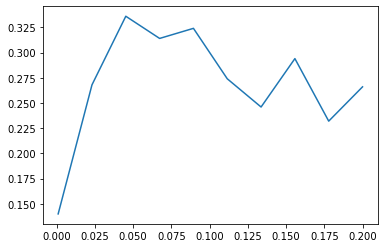

In [39]:
lambda_list = np.linspace(0.001, 0.2, 10)
err_list = test_lambda(lambda_list, X_train, y_train, X_test, y_test)
plt.plot(lambda_list, err_list)

In [1]:
w,test_analysis=Pegasos2(X_train, y_train,0.01,X_test,y_test)
#distribution
sample=[]
for i in range(len(X_test)):
  sample.append(dotProduct(w,X_test[i]))
sns.distplot(sample)

In [ ]:
error_analysis(0, err_list = classification_errorlist(w, X_test, y_test))